In [2]:
%matplotlib inline
from pylab import *
from sci378 import *
import pandas as pd

Version:  0.0.25


In [ ]:
from pyndamics3 import Simulation


Text(0, 0.5, 'Infections')

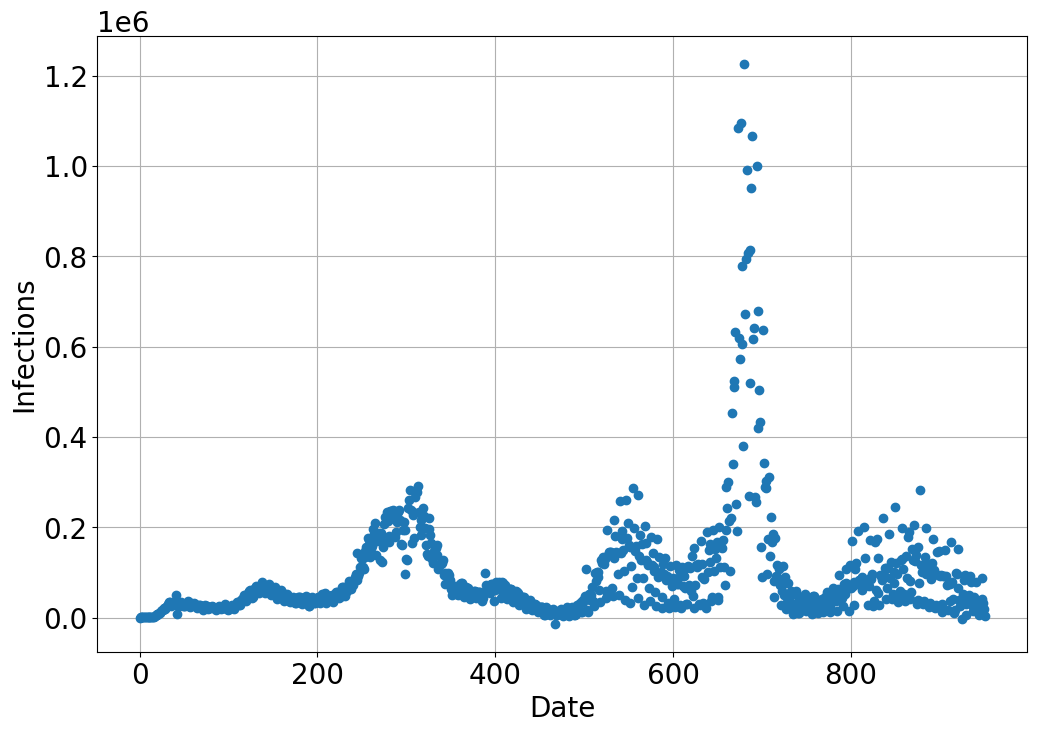

In [ ]:
data=pd.read_csv('../data/covid_data.csv')
data

t=arange(len(data['date']))
z=array(data['infected'])
plot(t,z,'o')
xlabel('Date')
ylabel('Infections')

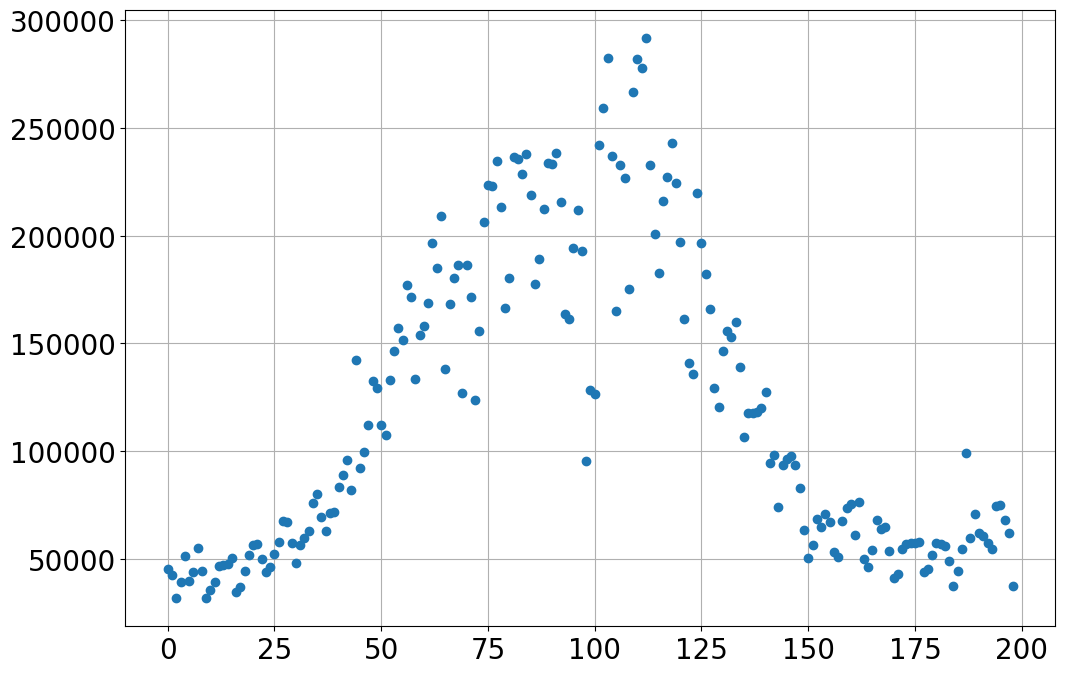

In [5]:
t_data=t[(t>200) & (t<400)]
z_data=z[(t>200) & (t<400)]

t_data=t_data-min(t_data)
plot(t_data,z_data,'o')

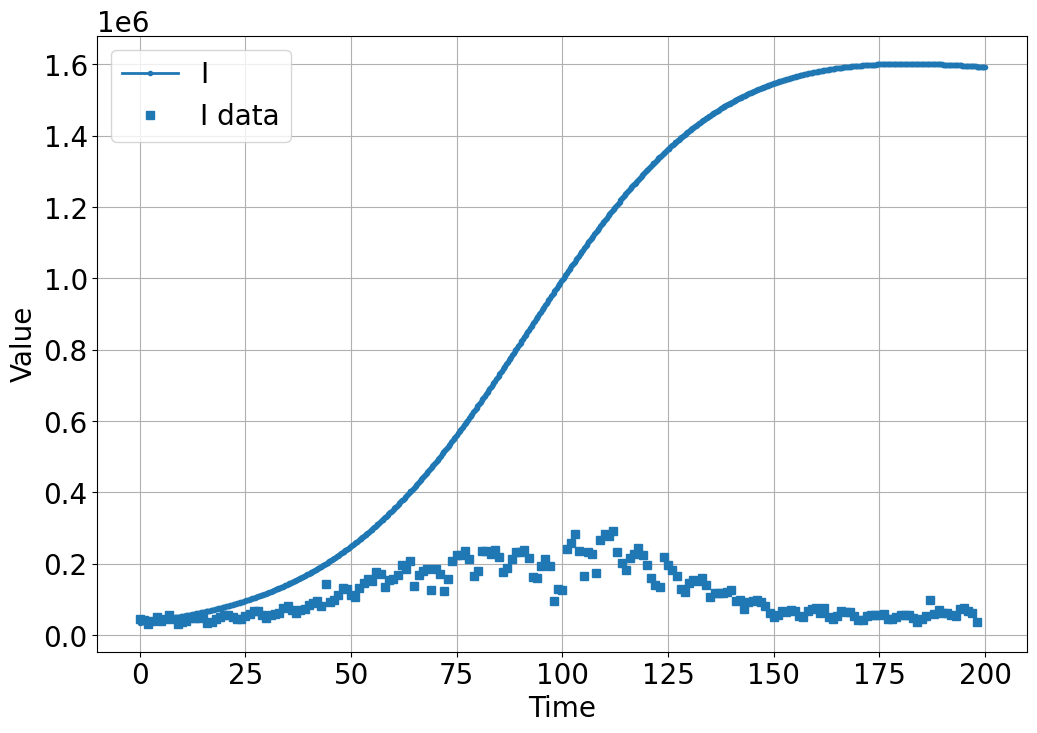

<Figure size 1200x800 with 0 Axes>

In [75]:
sim=Simulation()
sim.add(" S' = -β*S*I/N   ",1800000)
sim.add(" I' = β*S*I/N - γ*I",35000,plot=True)
sim.add(" R' = γ*I",80000)
sim.add(" N = S+I+R")
sim.params(β=.045,γ=.0012)
sim.add_data(t=t_data,I=z_data,plot=True)
sim.run(200)

In [76]:
from pyndamics3.mcmc import *

In [77]:
model=MCMCModel(sim,
                γ=Uniform(0,.1), 
                β=Normal(.045,.1,all_positive=True),
                initial_I=Normal(35000,1000,all_positive=True),
               )

Sampling Prior...
Done.
2.27 s
Running MCMC 1/3...
Done.
1 m, 24.95 s
Running MCMC 2/3...
Done.
1 m, 36.89 s
Running MCMC 3/3...
Done.
1 m, 35.61 s


<Figure size 1200x800 with 0 Axes>

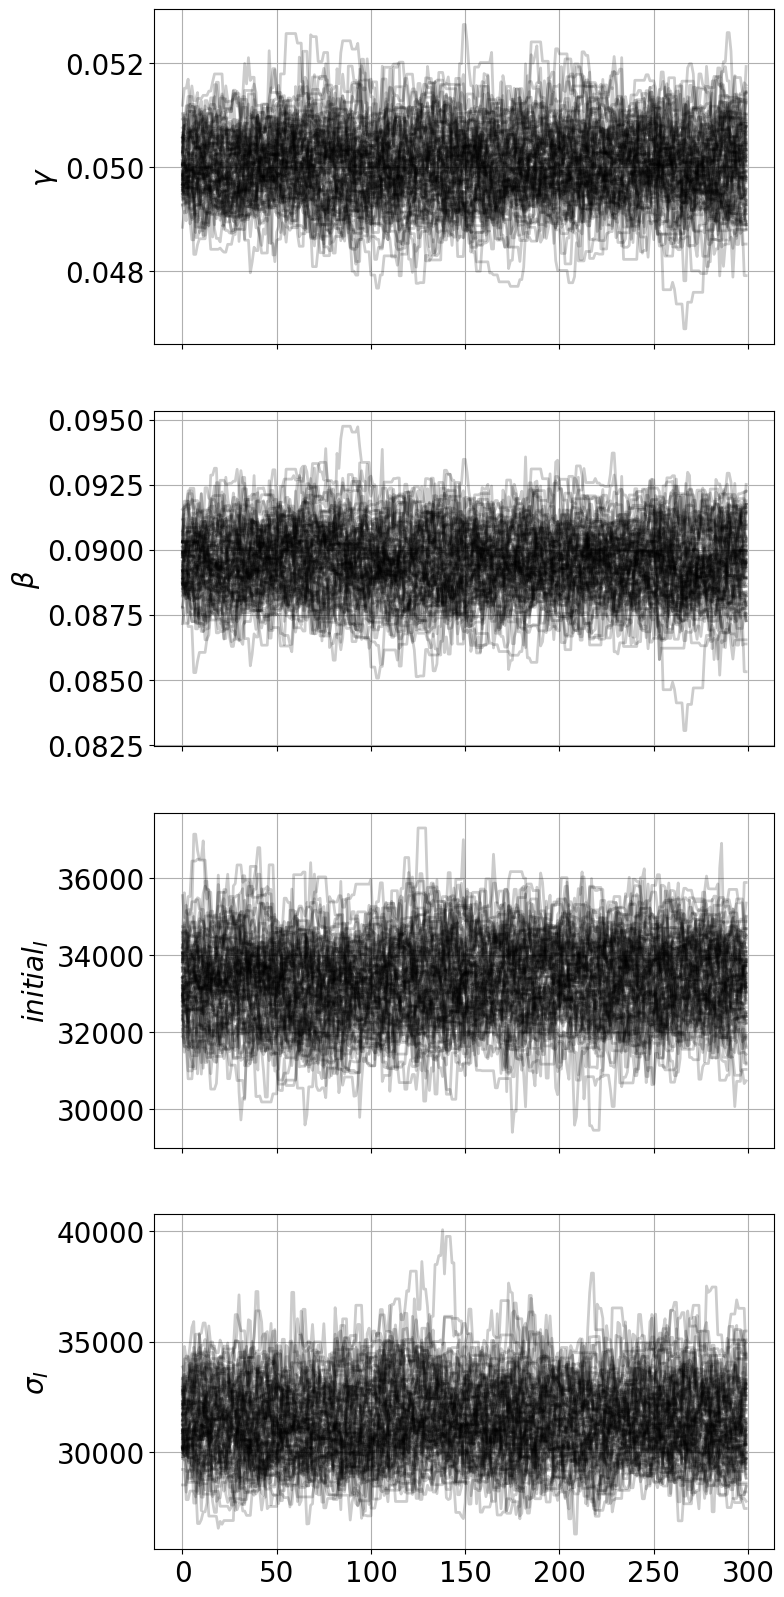

In [78]:
model.run_mcmc(300,repeat=3)
model.plot_chains()

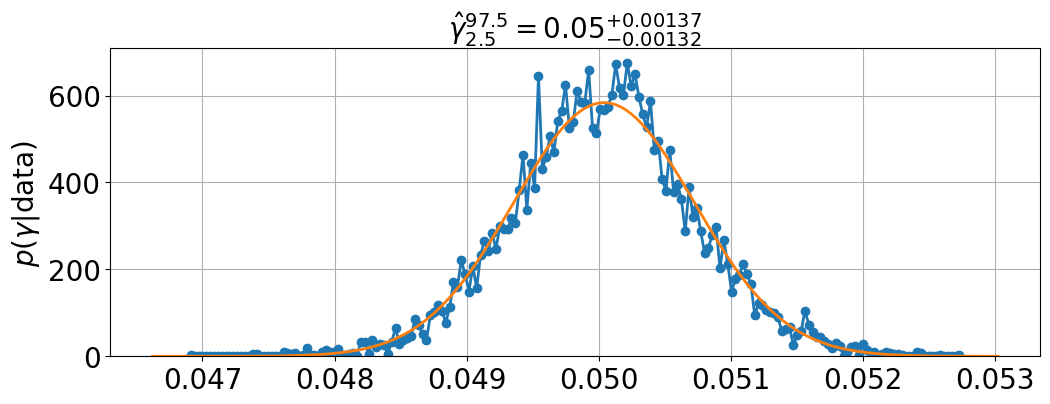

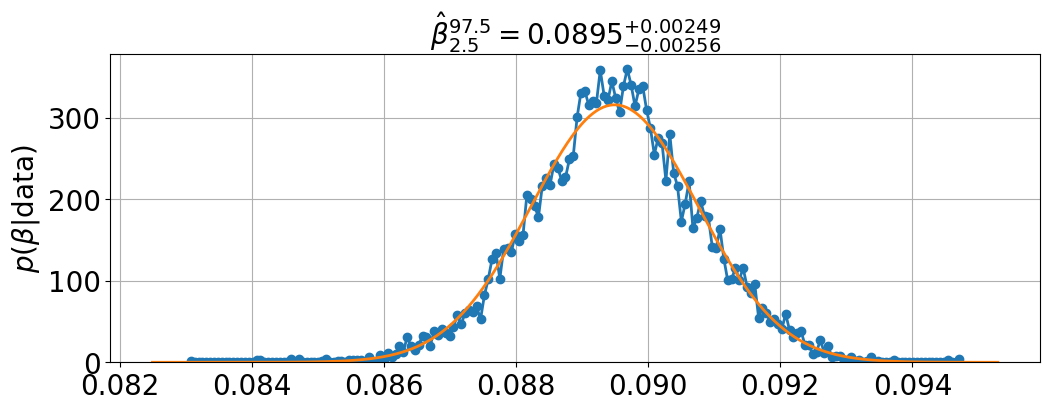

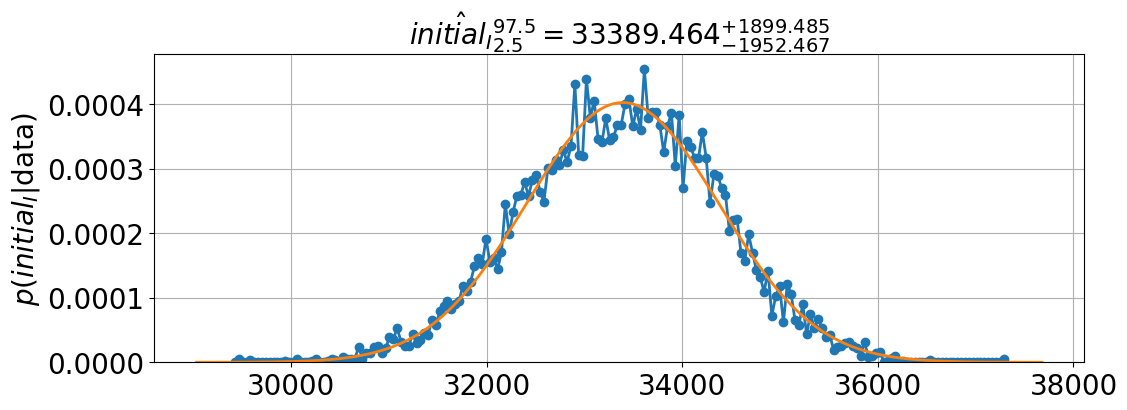

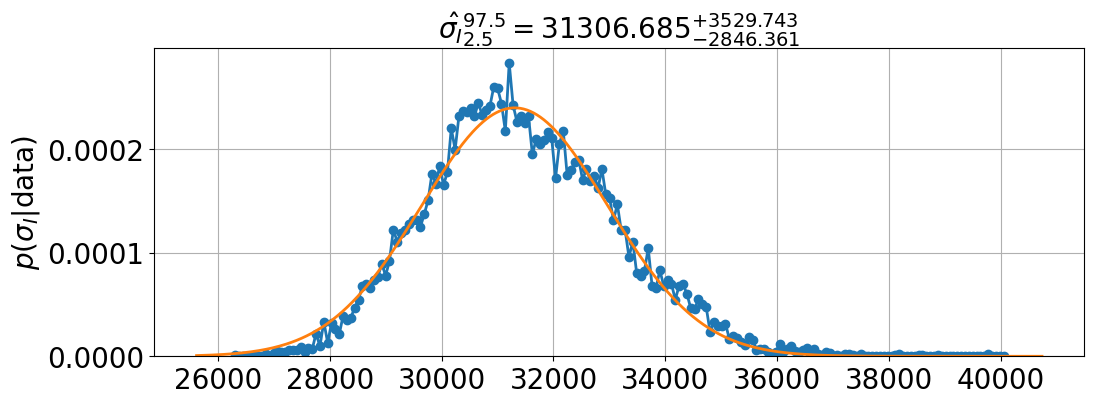

In [79]:
model.plot_distributions()

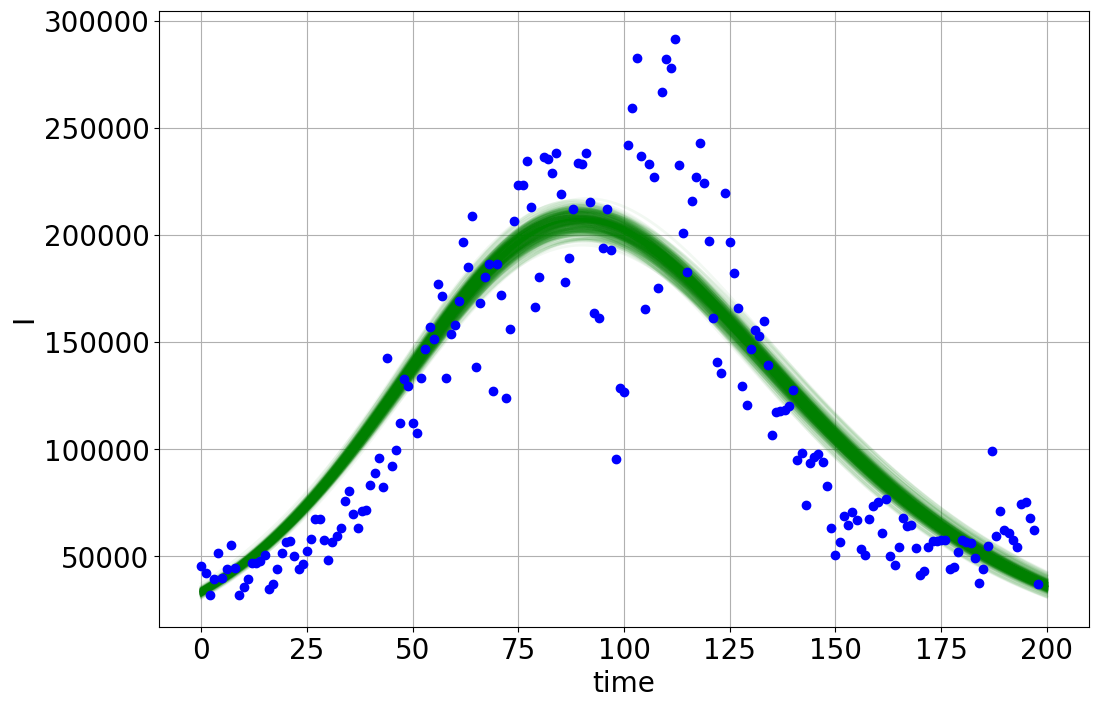

In [80]:
model.plot_many(0,200,'I',N=400)